In [9]:
import soundfile as sf
import numpy as np
import scipy as signal
import matplotlib.pyplot as plt

In [81]:
data1,samplerate = sf.read('/Users/hyh/Desktop/Test Files/Postfiltered/postfiltered_2020-01-08_09_25_03_1.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
              )
data2,samplerate = sf.read('/Users/hyh/Desktop/Test Files/Postfiltered/postfiltered_2020-01-08_09_25_03_2.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
              )

In [65]:
from scipy import signal
corr1 = signal.correlate(data1[:,0],data2[:,0],method='fft')/len(data1[:,0])

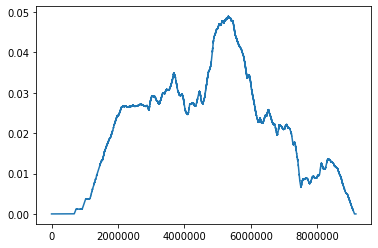

5320110


In [84]:
corr2 = signal.correlate(data1[:,0],data2[:,0],method='fft')/len(data1[:,0])

plt.plot(corr2)
plt.show()
print(np.argmax(np.abs(corr2)))

In [57]:
#0213 gcc-phat transform    
def truncate(sig1, sig2):
    l1, l2 = len(sig1), len(sig2)
    if l1 <= l2:
        return sig1, sig2[0:l1]
    else:
        return sig1[0:l2], sig2

def gcc_phat(sig1, sig2, fs=16000.0, max_tau=None, interp=1):
    '''
    This function computes the offset between the signal sig1 and the reference signal sig2
    using the Generalized Cross Correlation - Phase Transform (GCC-PHAT)method.
    '''
    # make sure the length for the FFT is larger or equal than len(sig1) + len(sig2)
    n = sig1.shape[0] + sig2.shape[0]
    
    n = 16000
    
    # Generalized Cross Correlation Phase Transform
    SIG1 = np.fft.fft(sig1)
    SIG2 = np.fft.fft(sig2)
    R = SIG1 * np.conj(SIG2)

    cc = np.fft.ifft(R / np.abs(R))
    
    tmpcc = cc

    max_shift = int(interp * n / 2)
    
    if max_tau:
        max_shift = np.minimum(int(interp * fs * max_tau), max_shift)

    cc = np.concatenate((cc[-max_shift:], cc[:max_shift+1]))

    # find max cross correlation index
    shift = np.argmax(np.abs(cc)) - max_shift

    tau = shift / (interp * fs)
    
    return tau, shift, tmpcc, cc, R, SIG1, SIG2

In [82]:
sig1, sig2 = truncate(data1[:,0], data2[:,0])
windowDuration, Fs = 1, 16000
# The number of samples in each window
l = windowDuration * Fs
N = len(sig1)
for i in range(97,98):
    sig1Temp, sig2Temp = sig1[i*l:l*(i+1)], sig2[i*l:l*(i+1)]
    
# t = 0:1/16000:1
# tau, shift, tmpcc, cc, R, SIG, SIG2 = gcc_phat(sig1Temp, sig2Temp, fs=16000.0, max_tau=None, interp=1)

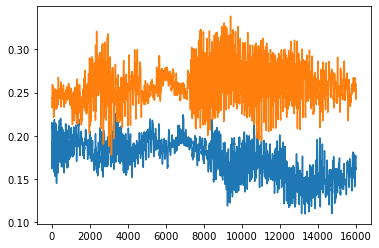

In [86]:
t = np.arange(0.0, 1.0, 1/16000)
y1 = np.sin(2*3.1415926*t)
y2 = np.sin(2*3.1415926*(t+0.05))
plt.plot(sig1Temp)
plt.plot(sig2Temp)
SIG1 = np.fft.fft(sig1Temp)
SIG2 = np.fft.fft(sig2Temp)
R = np.multiply(SIG1, np.conj(SIG2))/np.multiply(np.abs(SIG1), np.abs(SIG2))
cc = np.fft.ifft(R)
# shift = np.argmax(np.abs(cc))

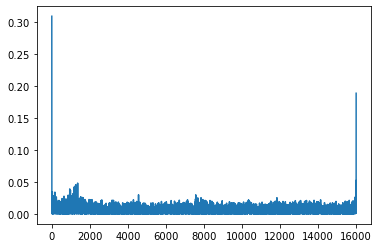

In [107]:
plt.plot(np.abs(cc))

In [101]:
np.max(np.real(cc))

0.188969939903185

In [103]:
np.real(cc)

array([-0.30957706,  0.16319643, -0.02793169, ...,  0.00197757,
       -0.03181798,  0.18896994])

In [95]:
import pyroomacoustics as pra
_,_,tau = pra.experimental.localization.tdoa(sig1Temp, sig2Temp, interp=1, fs=16000, phat=True)

TypeError: cannot unpack non-iterable numpy.float64 object

In [80]:
import numpy as np


def gcc_phat(sig, refsig, fs=1, max_tau=None, interp=16):
    '''
    This function computes the offset between the signal sig and the reference signal refsig
    using the Generalized Cross Correlation - Phase Transform (GCC-PHAT)method.
    '''
    
    # make sure the length for the FFT is larger or equal than len(sig) + len(refsig)
    n = sig.shape[0] + refsig.shape[0]

    # Generalized Cross Correlation Phase Transform
    SIG = np.fft.rfft(sig, n=n)
    REFSIG = np.fft.rfft(refsig, n=n)
    R = SIG * np.conj(REFSIG)

    cc = np.fft.irfft(R / np.abs(R), n=(interp * n))

    max_shift = int(interp * n / 2)
    if max_tau:
        max_shift = np.minimum(int(interp * fs * max_tau), max_shift)

    cc = np.concatenate((cc[-max_shift:], cc[:max_shift+1]))

    # find max cross correlation index
    shift = np.argmax(np.abs(cc)) - max_shift

    tau = shift / float(interp * fs)
    
    return tau, cc


def main():
    
    refsig = np.linspace(1, 10, 10)

    for i in range(0, 10):
        sig = np.concatenate((np.linspace(0, 0, i), refsig, np.linspace(0, 0, 10 - i)))
        offset, _ = gcc_phat(sig, refsig)
        print(offset)
        
main()

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


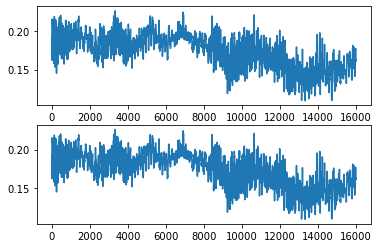

In [30]:
plt.subplot(2,1,1)
plt.plot(sig1Temp)
plt.subplot(2,1,2)
plt.plot(sig2Temp)

In [3]:
# Truncate signal, based on the signal that has the shorter length
def truncate(sig1, sig2):
    l1, l2 = len(sig1), len(sig2)
    if l1 <= l2:
        return sig1, sig2[0:l1]
    else:
        return sig1[0:l2], sig2

# PHAT Transfrorm 
def phatTransform(sig1, sig2, windowDuration, Fs, ):
    # Fs: Sampling Frequency
    # WindowDuration: the length of moving window in time (s)
    l = windowDuration * Fs
    N = len(sig1)
    # Padding
    if N%l != 0:
        padWidth = l-N%l
        sig1 = np.pad(sig1, (0, padWidth), 'constant', constant_values = 0)
        sig2 = np.pad(sig2, (0, padWidth), 'constant', constant_values = 0)
    numOfWindows = len(sig1)/l
    for i in range(0,numOfWindows):
        sig1Temp, sig2Temp = sig1[i*l:l*(i+1)], sig2[i*l:l*(i+1)]
        Fsig1 = np.fft.fft(sig1Temp)
        Fsig2 = np.fft.fft(sig2Temp)
        # Normalize magnitude to 1
        phat1 = np.exp(1j*np.angle(Fsig1))
        phat2 = np.exp(1j*np.angle(Fsig2))
        # Element wise multiplication
        product = np.multiply(phat1, phat2)
        # Inverse fourier transform
        IFFT = np.abs(np.fft.ifft(product))
        # Statistics
        maxValue, argmax, mean, std = max(IFFT), np.argmax(IFFT), np.mean(IFFT), np.std(IFFT)
        significance = (maxValue - mean) / std
        normalized = (IFFT-mean)/std
    

In [4]:
import numpy as np
from scipy import signal

# Truncate signal, based on the signal that has the shorter length
def truncate(sig1, sig2):
    l1, l2 = len(sig1), len(sig2)
    if l1 <= l2:
        return sig1, sig2[0:l1]
    else:
        return sig1[0:l2], sig2
    
sig1, sig2 = truncate(data1[:,0], data1[:,0])

windowDuration, Fs = 1, 16000
# The number of samples in each window
l = windowDuration * Fs
N = len(sig1)
# Padding
if N%l != 0:
    padWidth = l-N%l
    sig1 = np.pad(sig1, (0, padWidth), 'constant', constant_values = 0)
    sig2 = np.pad(sig2, (0, padWidth), 'constant', constant_values = 0)
    
numOfWindows = len(sig1)/l
for i in range(100,101):
    sig1Temp, sig2Temp = sig1[i*l:l*(i+1)], sig2[i*l:l*(i+1)]
    [f,crossSpectrum] = signal.csd(sig1Temp, sig2Temp, 
                                   nperseg=l,                   
                                   fs=16000.0, 
                                   window='hamming',
                                   return_onesided=False, 
                                   scaling='spectrum')
    weight = 1/np.abs(crossSpectrum)
    Rxy = np.fft.ifft(np.multiply(weight,crossSpectrum))
    
    
    
#     Fsig1 = np.fft.fft(sig1Temp)
#     Fsig2 = np.fft.fft(sig2Temp)
    
#     phat1 = np.exp(1j*np.angle(Fsig1))
#     phat2 = np.exp(1j*np.angle(Fsig2))
    
    
#     product = np.multiply(phat1, np.conj(phat2))
#     result = np.abs(signal.correlate(phat1,phat2))
#     IFFT = np.abs(np.fft.ifft(result))
    
# maxValue, argmax, mean, std = max(IFFT), np.argmax(IFFT), np.mean(IFFT), np.std(IFFT)
# significance = (maxValue - mean) / std
# normalized = (IFFT-mean)/std    

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply


In [5]:
len(Rxy)

16000

In [6]:
sig1Temp = (10**(-1))*np.ones(16000)
[f,crossSpectrum] = signal.csd(sig1Temp, sig1Temp, 
                               nperseg=l,                   
                               fs=16000.0, 
                               window='hamming',
                               return_onesided=False, 
                               scaling='spectrum')
weight = 1/np.abs(crossSpectrum)
Rxy = np.fft.ifft(np.multiply(weight,crossSpectrum))

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


In [7]:
np.argmin(crossSpectrum)

125

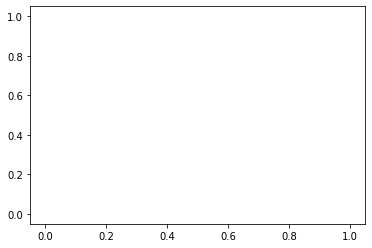

In [9]:
import matplotlib.pyplot as plt
plt.plot(Rxy[100:2000])

In [14]:
x = np.array([1,2,3,4,5,6,7,8])

In [17]:
x[:4]

array([1, 2, 3, 4])